Loading Mall Customer Segmentation Dataset...

=== Dataset Overview ===
Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

=== First 5 rows ===
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                  

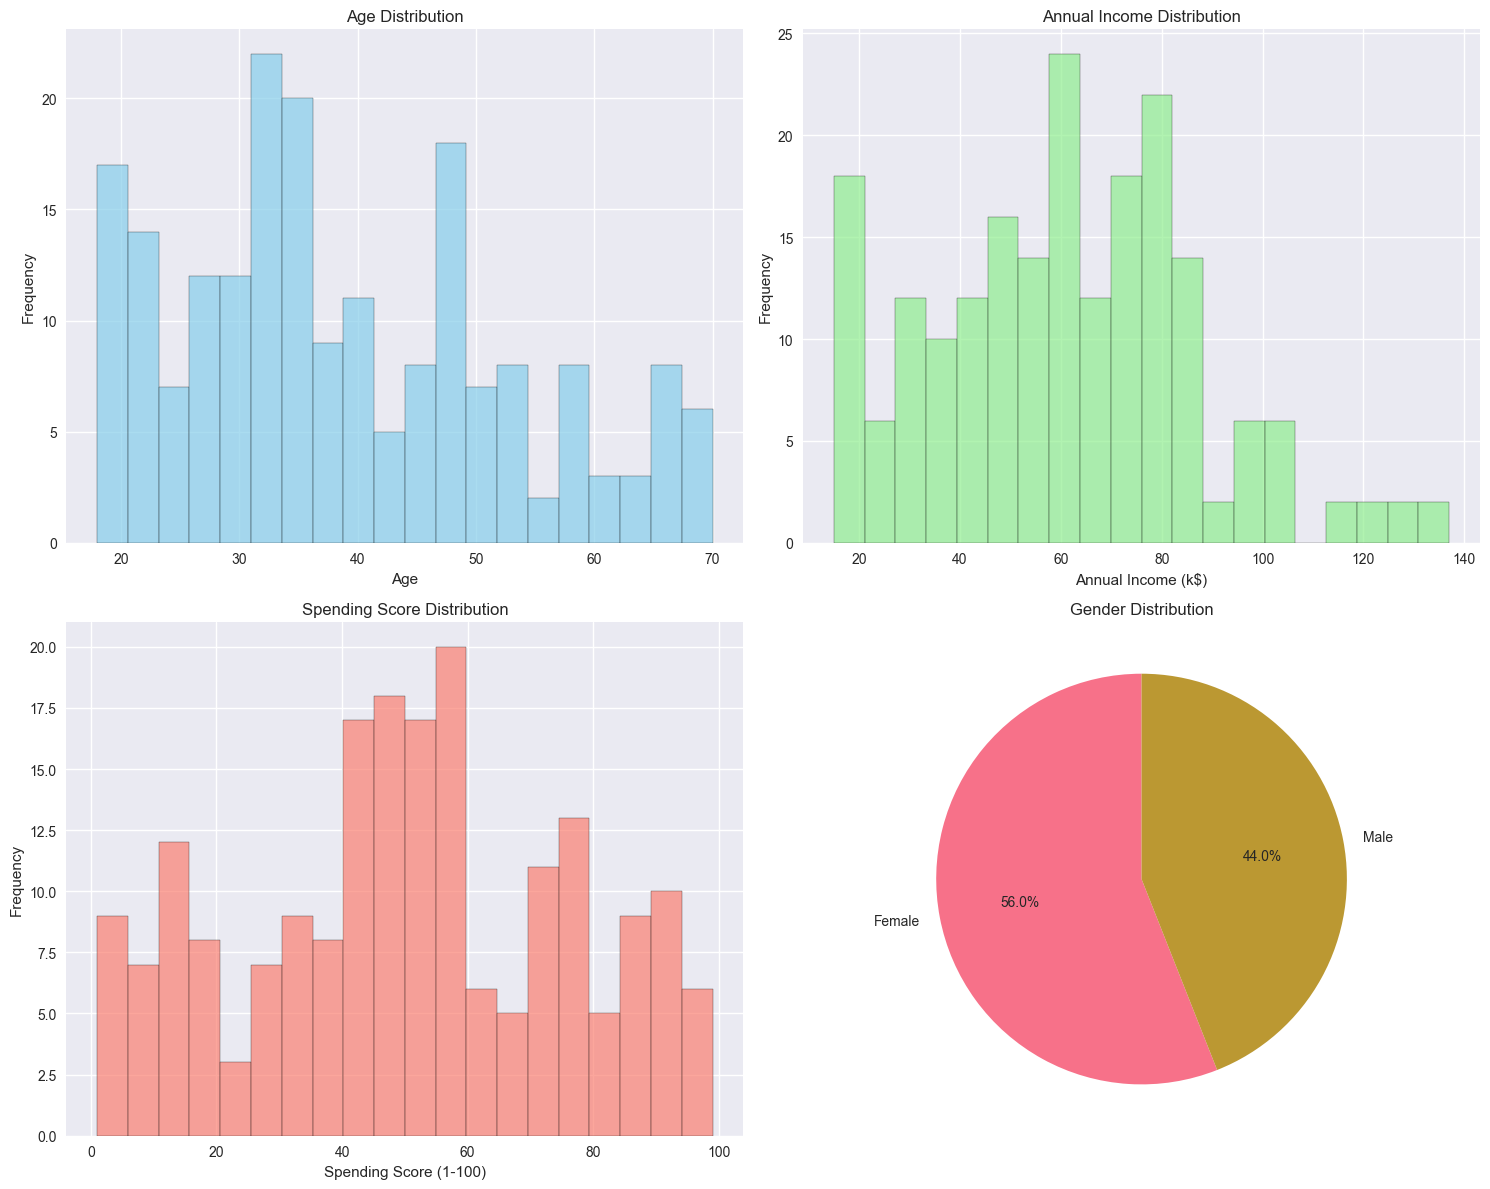


=== Correlation Analysis ===
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


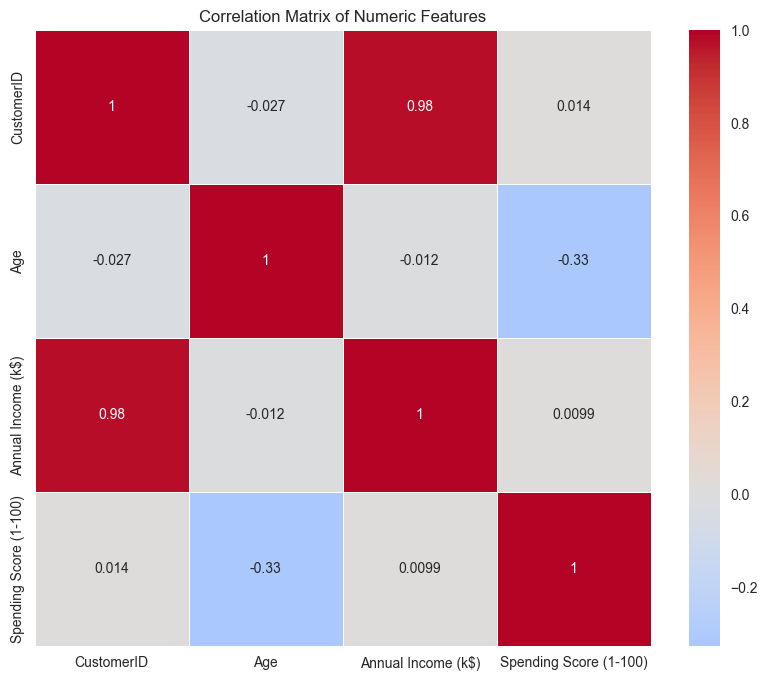


=== Gender-based Analysis ===
              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


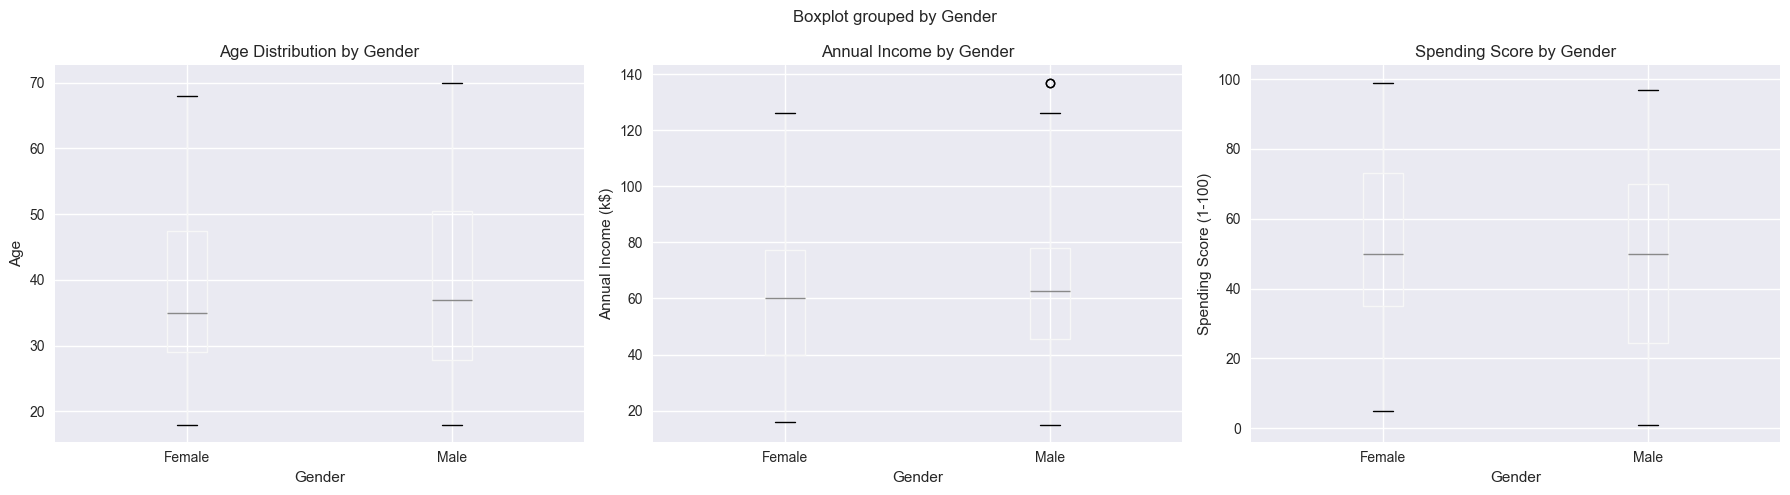


=== Part 1 Complete ===
Next: Data preprocessing and PCA analysis


In [1]:
# Task 8: Clustering with K-Means - Part 1
# Data Loading and Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Load the dataset
print("Loading Mall Customer Segmentation Dataset...")
df = pd.read_csv('Mall_Customers.csv')

# 2. Basic dataset information
print("\n=== Dataset Overview ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
print("\n=== First 5 rows ===")
print(df.head())

# 3. Dataset info and statistics
print("\n=== Dataset Information ===")
print(df.info())

print("\n=== Statistical Summary ===")
print(df.describe())

# 4. Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# 5. Data visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

# 6. Correlation analysis
print("\n=== Correlation Analysis ===")
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 7. Gender analysis
print("\n=== Gender-based Analysis ===")
gender_stats = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(gender_stats)

# Plot gender-based comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age by Gender
df.boxplot(column='Age', by='Gender', ax=axes[0])
axes[0].set_title('Age Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

# Annual Income by Gender
df.boxplot(column='Annual Income (k$)', by='Gender', ax=axes[1])
axes[1].set_title('Annual Income by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Annual Income (k$)')

# Spending Score by Gender
df.boxplot(column='Spending Score (1-100)', by='Gender', ax=axes[2])
axes[2].set_title('Spending Score by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

print("\n=== Part 1 Complete ===")
print("Next: Data preprocessing and PCA analysis")

=== Part 2: Data Preprocessing and PCA ===

1. Data Preprocessing...
Gender encoding: {'Female': 0, 'Male': 1}

Features for clustering (basic): ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Features for clustering (with gender): ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']

2. Feature Scaling...
Features scaled successfully!

Scaled features (basic) shape: (200, 3)
Scaled features (with gender) shape: (200, 4)

=== Scaling Statistics ===
Original features statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73

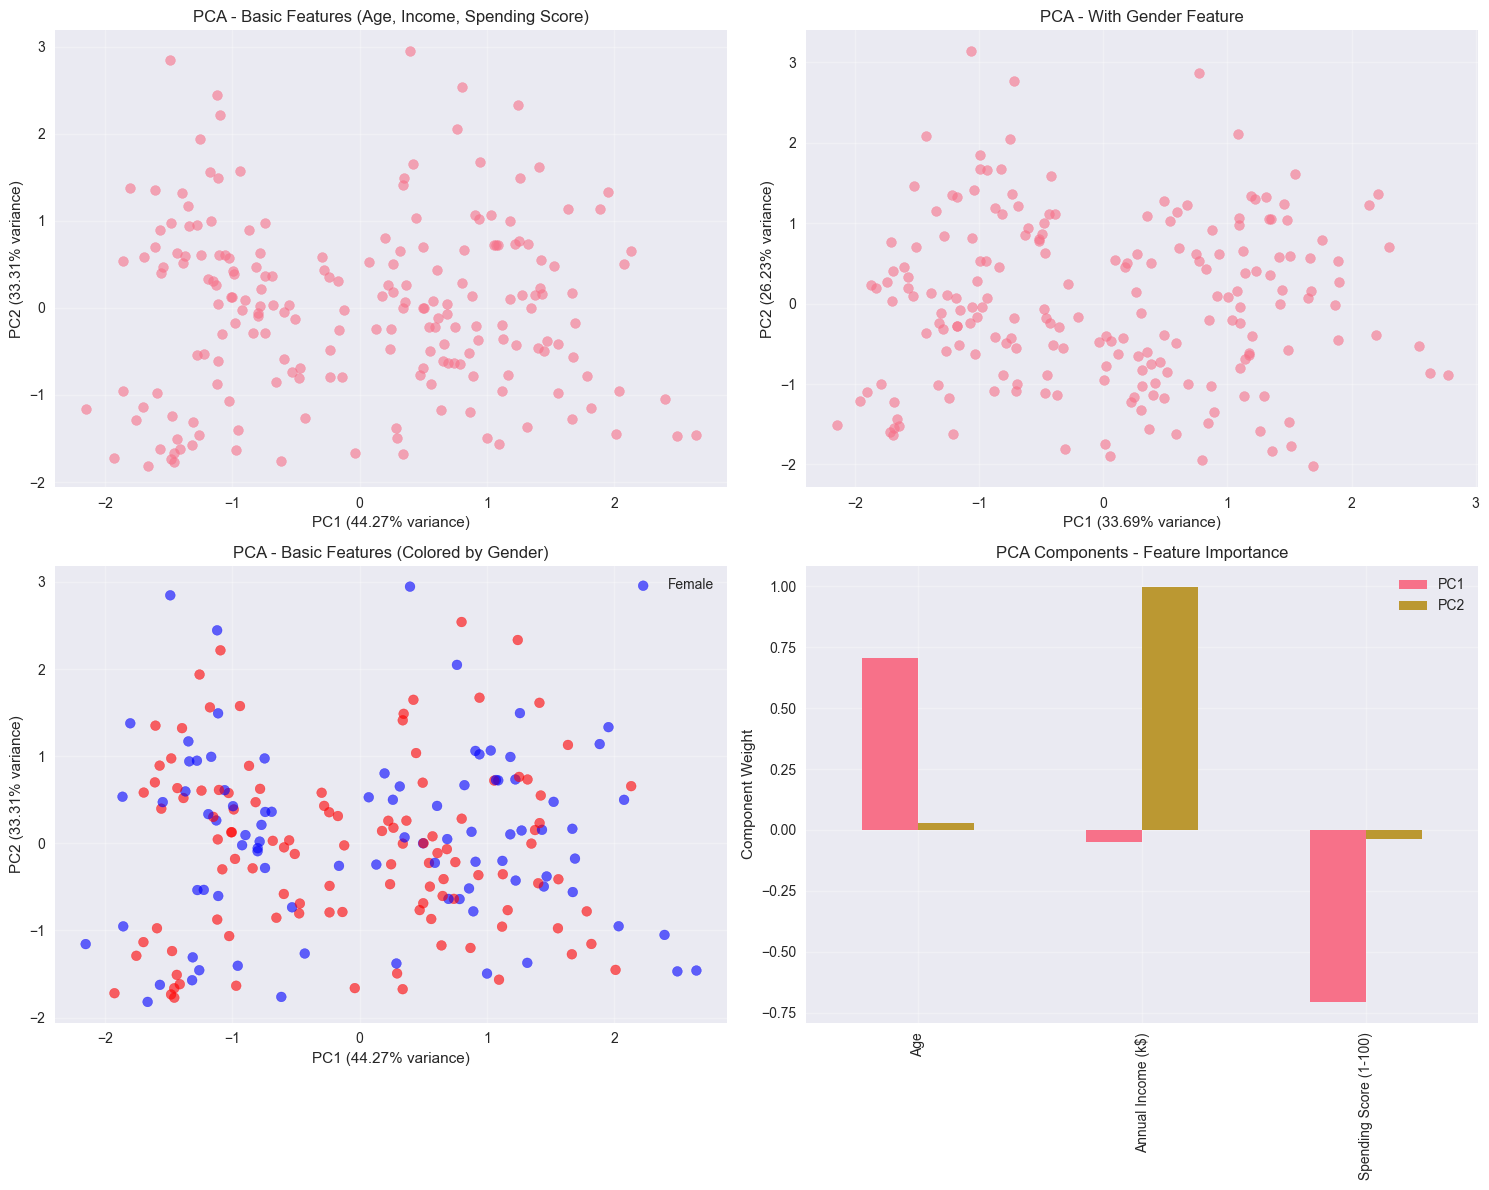


5. Original Feature Relationships...


<Figure size 1200x1000 with 0 Axes>

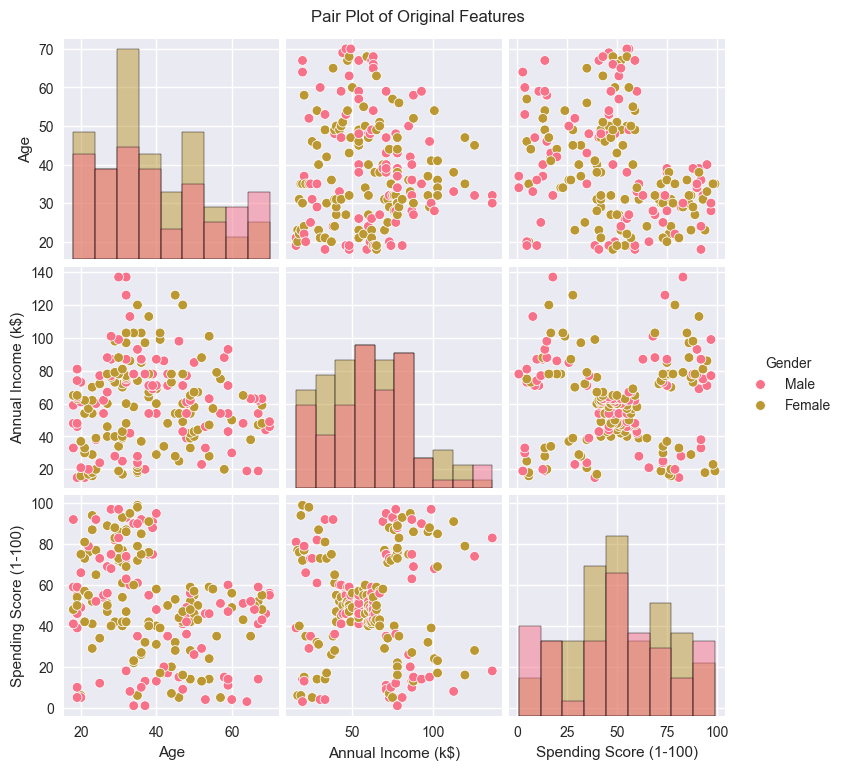


6. Saving processed data...
Processed data saved successfully!

=== Part 2 Complete ===
Next: Elbow Method and Optimal K Selection


In [2]:
# Task 8: Clustering with K-Means - Part 2
# Data Preprocessing and PCA Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (if not already loaded)
df = pd.read_csv('Mall_Customers.csv')

print("=== Part 2: Data Preprocessing and PCA ===\n")

# 1. Data Preprocessing
print("1. Data Preprocessing...")

# Handle categorical variables (Gender)
le = LabelEncoder()
df_processed = df.copy()
df_processed['Gender_encoded'] = le.fit_transform(df['Gender'])

print(f"Gender encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Select features for clustering
# We'll use Age, Annual Income, and Spending Score (and optionally Gender)
features_basic = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features_with_gender = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']

print(f"\nFeatures for clustering (basic): {features_basic}")
print(f"Features for clustering (with gender): {features_with_gender}")

# 2. Feature Scaling
print("\n2. Feature Scaling...")

# Scale features (basic set)
scaler_basic = StandardScaler()
X_scaled_basic = scaler_basic.fit_transform(df_processed[features_basic])

# Scale features (with gender)
scaler_with_gender = StandardScaler()
X_scaled_with_gender = scaler_with_gender.fit_transform(df_processed[features_with_gender])

print("Features scaled successfully!")

# Create DataFrames for scaled features
df_scaled_basic = pd.DataFrame(X_scaled_basic, columns=features_basic)
df_scaled_with_gender = pd.DataFrame(X_scaled_with_gender, columns=features_with_gender)

print(f"\nScaled features (basic) shape: {df_scaled_basic.shape}")
print(f"Scaled features (with gender) shape: {df_scaled_with_gender.shape}")

# Display scaling statistics
print("\n=== Scaling Statistics ===")
print("Original features statistics:")
print(df_processed[features_basic].describe())
print("\nScaled features statistics:")
print(df_scaled_basic.describe())

# 3. PCA Analysis
print("\n3. PCA Analysis...")

# PCA for basic features (3D -> 2D)
pca_basic = PCA(n_components=2)
X_pca_basic = pca_basic.fit_transform(X_scaled_basic)

print(f"PCA (basic features) - Explained variance ratio: {pca_basic.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_basic.explained_variance_ratio_):.4f}")

# PCA for features with gender (4D -> 2D)
pca_with_gender = PCA(n_components=2)
X_pca_with_gender = pca_with_gender.fit_transform(X_scaled_with_gender)

print(f"\nPCA (with gender) - Explained variance ratio: {pca_with_gender.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_with_gender.explained_variance_ratio_):.4f}")

# 4. Visualize PCA results
print("\n4. Visualizing PCA Results...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# PCA scatter plot (basic features)
axes[0, 0].scatter(X_pca_basic[:, 0], X_pca_basic[:, 1], alpha=0.6, s=50)
axes[0, 0].set_title('PCA - Basic Features (Age, Income, Spending Score)')
axes[0, 0].set_xlabel(f'PC1 ({pca_basic.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca_basic.explained_variance_ratio_[1]:.2%} variance)')
axes[0, 0].grid(True, alpha=0.3)

# PCA scatter plot (with gender)
axes[0, 1].scatter(X_pca_with_gender[:, 0], X_pca_with_gender[:, 1], alpha=0.6, s=50)
axes[0, 1].set_title('PCA - With Gender Feature')
axes[0, 1].set_xlabel(f'PC1 ({pca_with_gender.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 1].set_ylabel(f'PC2 ({pca_with_gender.explained_variance_ratio_[1]:.2%} variance)')
axes[0, 1].grid(True, alpha=0.3)

# PCA colored by Gender
colors = ['red' if gender == 'Female' else 'blue' for gender in df['Gender']]
axes[1, 0].scatter(X_pca_basic[:, 0], X_pca_basic[:, 1], c=colors, alpha=0.6, s=50)
axes[1, 0].set_title('PCA - Basic Features (Colored by Gender)')
axes[1, 0].set_xlabel(f'PC1 ({pca_basic.explained_variance_ratio_[0]:.2%} variance)')
axes[1, 0].set_ylabel(f'PC2 ({pca_basic.explained_variance_ratio_[1]:.2%} variance)')
axes[1, 0].legend(['Female', 'Male'])
axes[1, 0].grid(True, alpha=0.3)

# Feature importance in PCA
components_df = pd.DataFrame(
    pca_basic.components_.T,
    columns=['PC1', 'PC2'],
    index=features_basic
)

components_df.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('PCA Components - Feature Importance')
axes[1, 1].set_ylabel('Component Weight')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Original feature relationships
print("\n5. Original Feature Relationships...")

# Create pair plot for original features
plt.figure(figsize=(12, 10))
sns.pairplot(df_processed[features_basic + ['Gender']], hue='Gender', diag_kind='hist')
plt.suptitle('Pair Plot of Original Features', y=1.02)
plt.show()

# 6. Save processed data for next parts
print("\n6. Saving processed data...")

# Save scaled features
df_for_clustering = pd.DataFrame(X_scaled_basic, columns=features_basic)
df_for_clustering.to_csv('scaled_features.csv', index=False)

# Save PCA results
pca_df = pd.DataFrame(X_pca_basic, columns=['PC1', 'PC2'])
pca_df.to_csv('pca_features.csv', index=False)

print("Processed data saved successfully!")

print("\n=== Part 2 Complete ===")
print("Next: Elbow Method and Optimal K Selection")

=== Part 3: Elbow Method and Optimal K Selection ===

1. Implementing Elbow Method...
Testing different values of K...
K=1: Inertia=600.00, Silhouette Score=0.0000
K=2: Inertia=389.39, Silhouette Score=0.3355
K=3: Inertia=295.21, Silhouette Score=0.3578
K=4: Inertia=205.23, Silhouette Score=0.4040
K=5: Inertia=168.25, Silhouette Score=0.4166
K=6: Inertia=133.87, Silhouette Score=0.4284
K=7: Inertia=117.01, Silhouette Score=0.4172
K=8: Inertia=103.87, Silhouette Score=0.4082
K=9: Inertia=93.09, Silhouette Score=0.4177
K=10: Inertia=82.39, Silhouette Score=0.4066

2. Finding Optimal K using Knee Detection...
Optimal K (Elbow Method): 4
Optimal K (Silhouette Score): 6

3. Visualizing Results...


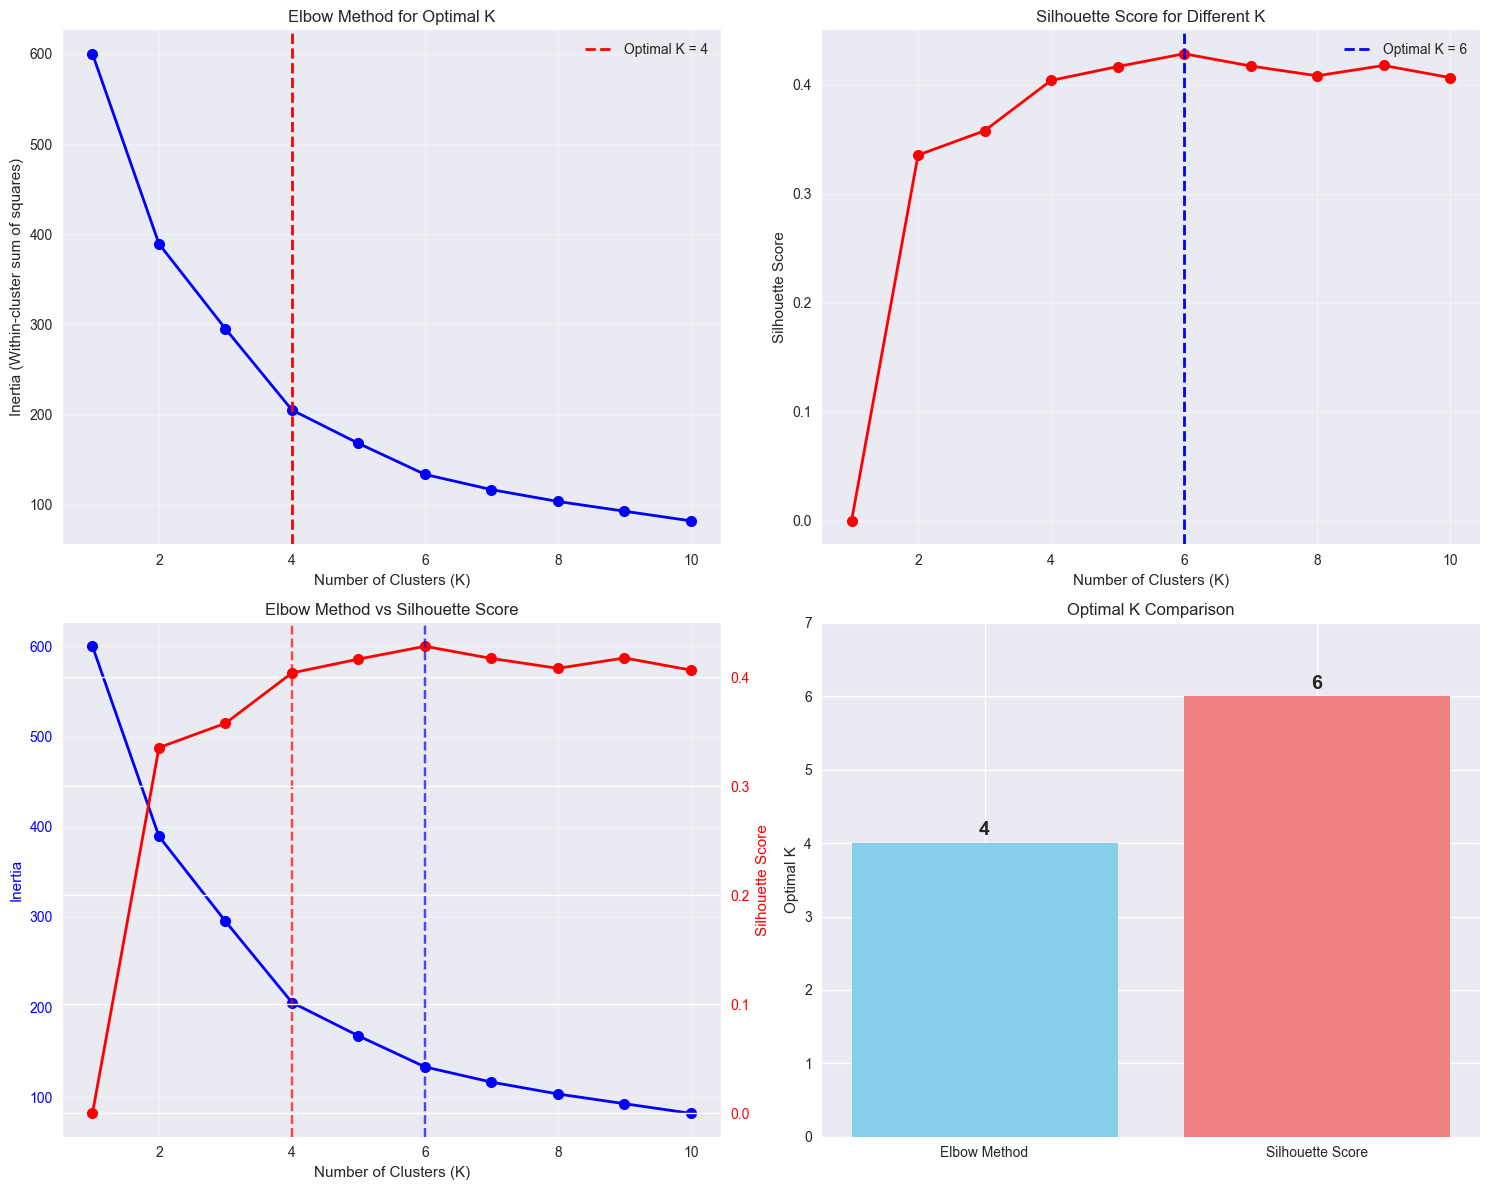


4. Detailed Analysis for Different K Values...
    K   Inertia  Silhouette_Score  Inertia_Reduction  Reduction_Percentage
0   1  600.0000            0.0000             0.0000                0.0000
1   2  389.3862            0.3355           210.6138               35.1023
2   3  295.2122            0.3578            94.1739               24.1852
3   4  205.2251            0.4040            89.9871               30.4822
4   5  168.2476            0.4166            36.9776               18.0180
5   6  133.8684            0.4284            34.3792               20.4337
6   7  117.0116            0.4172            16.8569               12.5921
7   8  103.8733            0.4082            13.1383               11.2282
8   9   93.0929            0.4177            10.7804               10.3784
9  10   82.3852            0.4066            10.7077               11.5022

5. Testing Specific K Values...

K = 3:
  Inertia: 295.21
  Silhouette Score: 0.3578
  Cluster Sizes: {0: 68, 1: 41, 2: 91}
  

In [3]:
# Task 8: Clustering with K-Means - Part 3
# Elbow Method and Optimal K Selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

# Load the dataset and prepare features
df = pd.read_csv('Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print("=== Part 3: Elbow Method and Optimal K Selection ===\n")

# 1. Elbow Method
print("1. Implementing Elbow Method...")

# Test different numbers of clusters
k_range = range(1, 11)
inertias = []
silhouette_scores = []

print("Testing different values of K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)
    
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_scores[-1]:.4f}")

# 2. Find optimal K using KneeLocator
print("\n2. Finding Optimal K using Knee Detection...")

# Use KneeLocator to find the elbow point
knee_locator = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
optimal_k_elbow = knee_locator.knee

print(f"Optimal K (Elbow Method): {optimal_k_elbow}")

# Find optimal K using silhouette score
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")

# 3. Visualize Elbow Method and Silhouette Analysis
print("\n3. Visualizing Results...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow Plot
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(x=optimal_k_elbow, color='red', linestyle='--', linewidth=2, 
                   label=f'Optimal K = {optimal_k_elbow}')
axes[0, 0].set_title('Elbow Method for Optimal K')
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=optimal_k_silhouette, color='blue', linestyle='--', linewidth=2, 
                   label=f'Optimal K = {optimal_k_silhouette}')
axes[0, 1].set_title('Silhouette Score for Different K')
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Combined plot
axes[1, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8, label='Inertia')
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Inertia', color='blue')
axes[1, 0].tick_params(axis='y', labelcolor='blue')
axes[1, 0].axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7)

# Create second y-axis for silhouette scores
ax2 = axes[1, 0].twinx()
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8, label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axvline(x=optimal_k_silhouette, color='blue', linestyle='--', alpha=0.7)

axes[1, 0].set_title('Elbow Method vs Silhouette Score')
axes[1, 0].grid(True, alpha=0.3)

# Bar chart comparison
methods = ['Elbow Method', 'Silhouette Score']
optimal_ks = [optimal_k_elbow, optimal_k_silhouette]
bars = axes[1, 1].bar(methods, optimal_ks, color=['skyblue', 'lightcoral'])
axes[1, 1].set_title('Optimal K Comparison')
axes[1, 1].set_ylabel('Optimal K')
axes[1, 1].set_ylim(0, max(optimal_ks) + 1)

# Add value labels on bars
for bar, value in zip(bars, optimal_ks):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{value}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Detailed Analysis for different K values
print("\n4. Detailed Analysis for Different K Values...")

# Create a detailed comparison table
results_df = pd.DataFrame({
    'K': k_range,
    'Inertia': inertias,
    'Silhouette_Score': silhouette_scores,
    'Inertia_Reduction': [0] + [inertias[i-1] - inertias[i] for i in range(1, len(inertias))],
    'Reduction_Percentage': [0] + [(inertias[i-1] - inertias[i])/inertias[i-1] * 100 for i in range(1, len(inertias))]
})

print(results_df.round(4))

# 5. Test specific K values in detail
print("\n5. Testing Specific K Values...")

# Test the most promising K values
test_k_values = [3, 4, 5, 6]
detailed_results = []

for k in test_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Calculate cluster sizes
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    detailed_results.append({
        'K': k,
        'Inertia': inertia,
        'Silhouette_Score': silhouette_avg,
        'Cluster_Sizes': cluster_sizes,
        'Min_Cluster_Size': min(counts),
        'Max_Cluster_Size': max(counts),
        'Cluster_Balance': min(counts) / max(counts)
    })
    
    print(f"\nK = {k}:")
    print(f"  Inertia: {inertia:.2f}")
    print(f"  Silhouette Score: {silhouette_avg:.4f}")
    print(f"  Cluster Sizes: {cluster_sizes}")
    print(f"  Cluster Balance: {min(counts) / max(counts):.3f}")

# 6. Recommendation
print("\n6. Recommendation...")

# Calculate a combined score (weighted average)
weight_silhouette = 0.7
weight_balance = 0.3

best_k = None
best_score = -1

for result in detailed_results:
    combined_score = (weight_silhouette * result['Silhouette_Score'] + 
                     weight_balance * result['Cluster_Balance'])
    
    if combined_score > best_score:
        best_score = combined_score
        best_k = result['K']

print(f"Based on combined analysis:")
print(f"  - Elbow Method suggests K = {optimal_k_elbow}")
print(f"  - Silhouette Score suggests K = {optimal_k_silhouette}")
print(f"  - Combined score (considering balance) suggests K = {best_k}")

# Final recommendation
if optimal_k_elbow == optimal_k_silhouette:
    recommended_k = optimal_k_elbow
    print(f"\nRecommended K: {recommended_k} (Both methods agree)")
else:
    recommended_k = best_k
    print(f"\nRecommended K: {recommended_k} (Based on combined analysis)")

# Save results for next part
results_summary = {
    'recommended_k': recommended_k,
    'elbow_k': optimal_k_elbow,
    'silhouette_k': optimal_k_silhouette,
    'all_results': results_df
}

print(f"\nSaving results for next part...")
print(f"Recommended K for clustering: {recommended_k}")

print("\n=== Part 3 Complete ===")
print("Next: K-Means Clustering Implementation and Visualization")

=== Part 4: K-Means Implementation and Cluster Visualization ===

1. Implementing K-Means Clustering...
Using K = 5 clusters
Clustering completed!
Number of clusters: 5
Inertia: 168.25
Silhouette Score: 0.4166

2. Cluster Analysis...
Cluster sizes:
  Cluster 0: 20 customers (10.0%)
  Cluster 1: 54 customers (27.0%)
  Cluster 2: 40 customers (20.0%)
  Cluster 3: 39 customers (19.5%)
  Cluster 4: 47 customers (23.5%)

Cluster Centers (Original Scale):
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  46.25               26.75                   18.35        0
1  25.19               41.09                   62.24        1
2  32.88               86.10                   81.53        2
3  39.87               86.10                   19.36        3
4  55.64               54.38                   48.85        4

3. Cluster Characteristics...
Cluster Statistics:
           Age                Annual Income (k$)                  \
          mean    std min max               mean    std

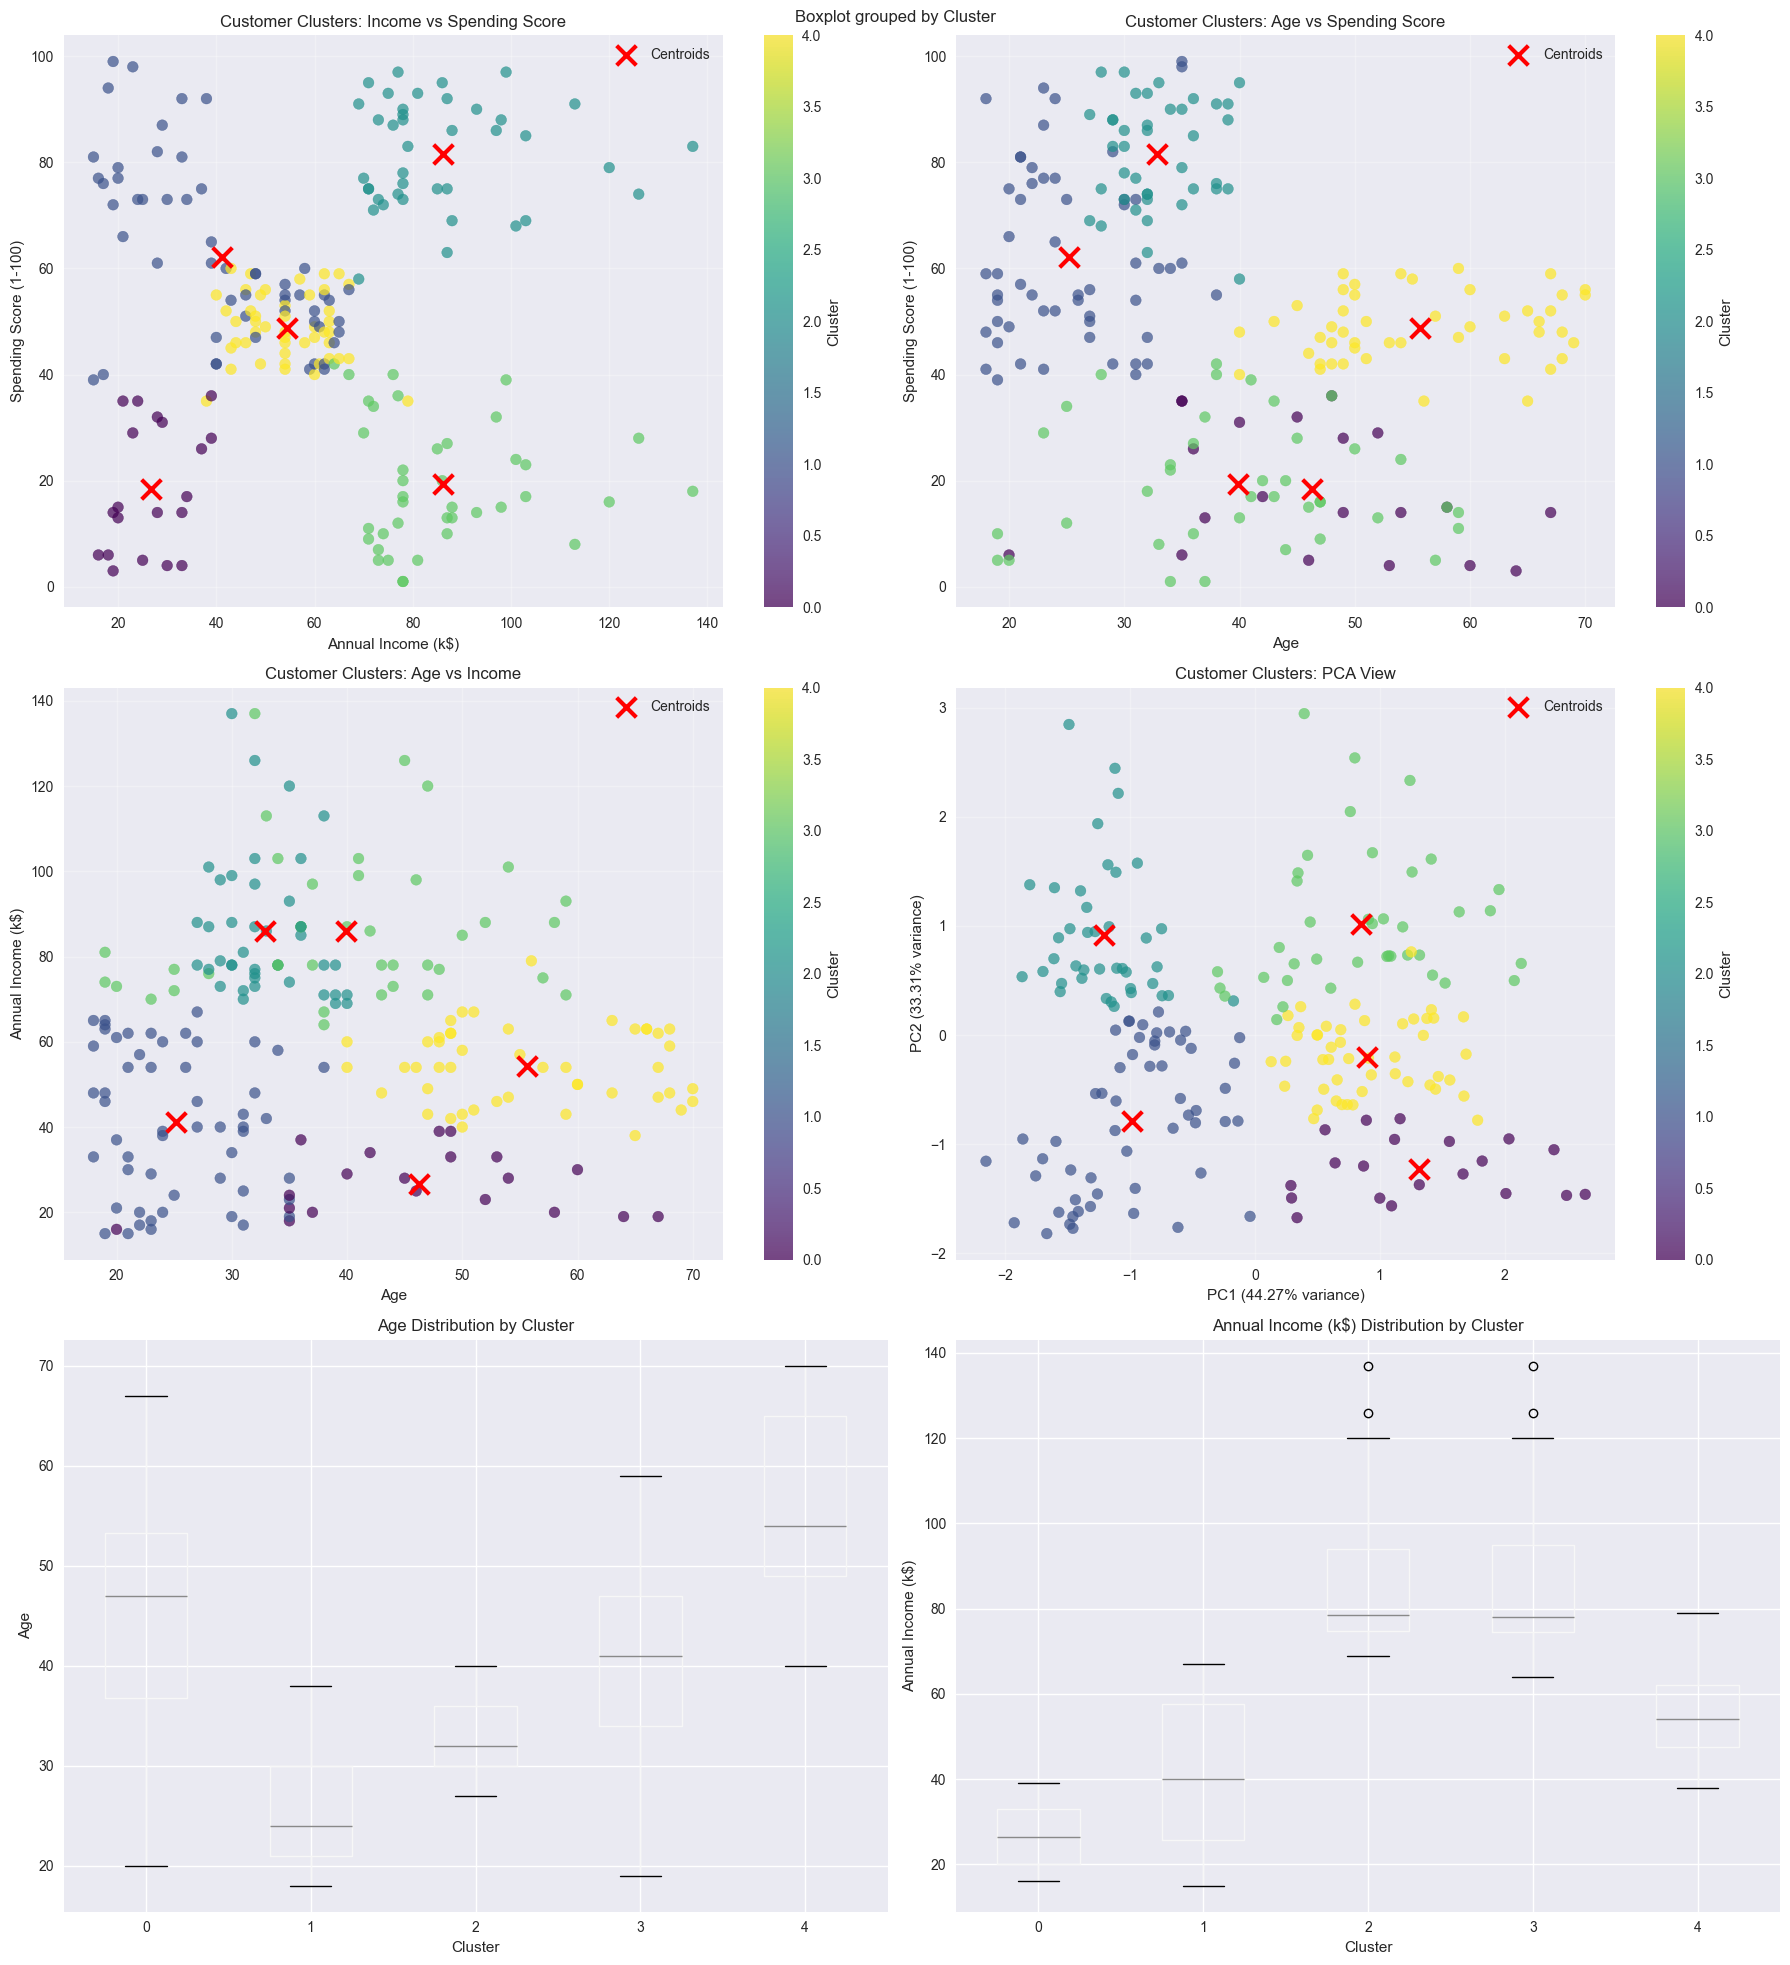


4.6 Creating Cluster Profiles...


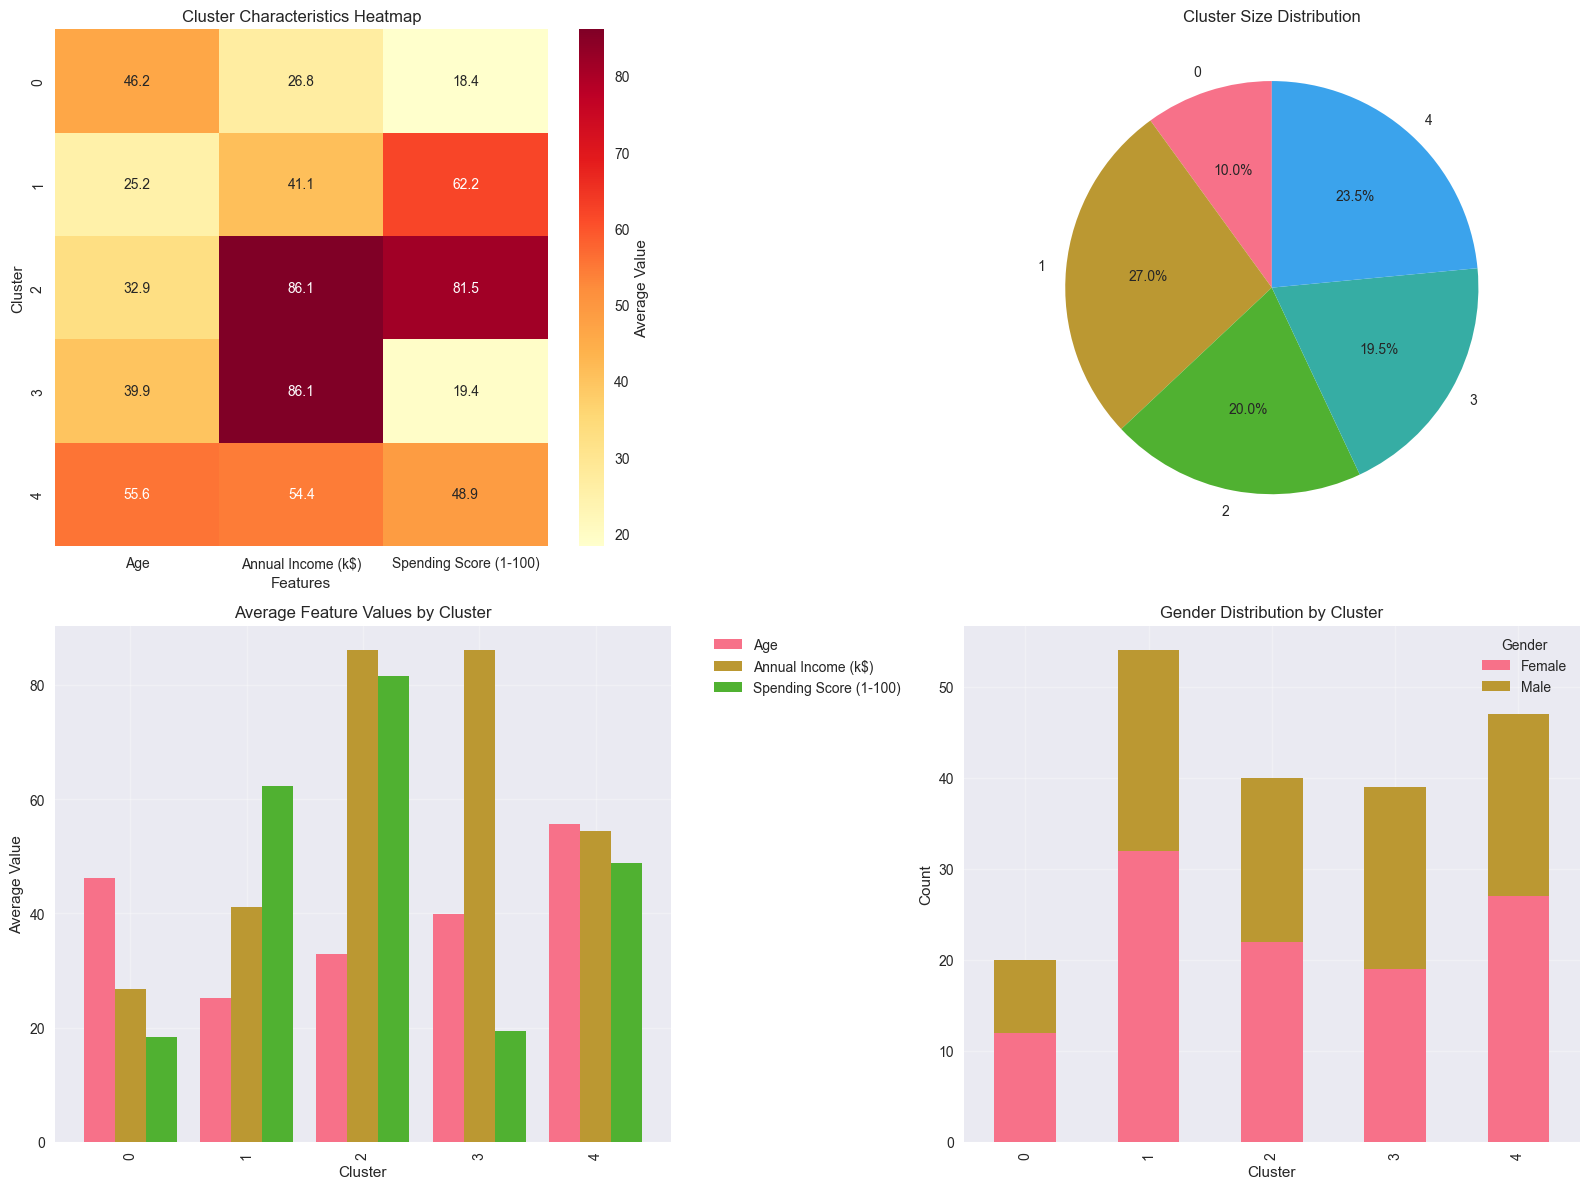


5. Cluster Interpretation...

Cluster 0: Low Income, Low Spending
  Size: 20 customers (10.0%)
  Average Age: 46.2 years
  Average Income: $26.8k
  Average Spending Score: 18.4

Cluster 1: Moderate Income, Moderate Spending
  Size: 54 customers (27.0%)
  Average Age: 25.2 years
  Average Income: $41.1k
  Average Spending Score: 62.2

Cluster 2: High Income, High Spending
  Size: 40 customers (20.0%)
  Average Age: 32.9 years
  Average Income: $86.1k
  Average Spending Score: 81.5

Cluster 3: High Income, Low Spending
  Size: 39 customers (19.5%)
  Average Age: 39.9 years
  Average Income: $86.1k
  Average Spending Score: 19.4

Cluster 4: Moderate Income, Moderate Spending
  Size: 47 customers (23.5%)
  Average Age: 55.6 years
  Average Income: $54.4k
  Average Spending Score: 48.9

6. Business Insights and Recommendations...

Key Findings:
• Most Profitable Clusters: [2]
  → Focus marketing efforts on these high-value customers
• Growth Opportunity Clusters: [3]
  → Target with promot

In [4]:
# Task 8: Clustering with K-Means - Part 4
# K-Means Implementation and Cluster Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Load the dataset and prepare features
df = pd.read_csv('Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print("=== Part 4: K-Means Implementation and Cluster Visualization ===\n")

# 1. Implement K-Means with optimal K
print("1. Implementing K-Means Clustering...")

# Use K=5 based on our previous analysis (you can change this based on your Part 3 results)
optimal_k = 5
print(f"Using K = {optimal_k} clusters")

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

print(f"Clustering completed!")
print(f"Number of clusters: {optimal_k}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")

# 2. Cluster Analysis
print("\n2. Cluster Analysis...")

# Cluster sizes
cluster_sizes = df_clustered['Cluster'].value_counts().sort_index()
print(f"Cluster sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"  Cluster {cluster_id}: {size} customers ({size/len(df)*100:.1f}%)")

# Cluster centers (in original scale)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
centers_df = pd.DataFrame(cluster_centers_original, columns=features)
centers_df['Cluster'] = range(optimal_k)

print(f"\nCluster Centers (Original Scale):")
print(centers_df.round(2))

# 3. Cluster Characteristics
print("\n3. Cluster Characteristics...")

# Calculate statistics for each cluster
cluster_stats = df_clustered.groupby('Cluster')[features].agg(['mean', 'std', 'min', 'max']).round(2)
print("Cluster Statistics:")
print(cluster_stats)

# Gender distribution by cluster
gender_by_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Gender'])
print(f"\nGender Distribution by Cluster:")
print(gender_by_cluster)

# 4. Visualizations
print("\n4. Creating Visualizations...")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

# 4.1 Scatter plot: Income vs Spending Score
scatter = axes[0, 0].scatter(df_clustered['Annual Income (k$)'], 
                            df_clustered['Spending Score (1-100)'], 
                            c=df_clustered['Cluster'], 
                            cmap='viridis', s=60, alpha=0.7)
axes[0, 0].scatter(centers_df['Annual Income (k$)'], 
                  centers_df['Spending Score (1-100)'], 
                  c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')
axes[0, 0].set_title('Customer Clusters: Income vs Spending Score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Cluster')

# 4.2 Scatter plot: Age vs Spending Score
scatter2 = axes[0, 1].scatter(df_clustered['Age'], 
                             df_clustered['Spending Score (1-100)'], 
                             c=df_clustered['Cluster'], 
                             cmap='viridis', s=60, alpha=0.7)
axes[0, 1].scatter(centers_df['Age'], 
                  centers_df['Spending Score (1-100)'], 
                  c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].set_title('Customer Clusters: Age vs Spending Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1], label='Cluster')

# 4.3 Scatter plot: Age vs Income
scatter3 = axes[1, 0].scatter(df_clustered['Age'], 
                             df_clustered['Annual Income (k$)'], 
                             c=df_clustered['Cluster'], 
                             cmap='viridis', s=60, alpha=0.7)
axes[1, 0].scatter(centers_df['Age'], 
                  centers_df['Annual Income (k$)'], 
                  c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Annual Income (k$)')
axes[1, 0].set_title('Customer Clusters: Age vs Income')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0], label='Cluster')

# 4.4 3D scatter plot (flattened to 2D using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
scatter4 = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], 
                             c=df_clustered['Cluster'], 
                             cmap='viridis', s=60, alpha=0.7)
# Transform cluster centers to PCA space
centers_pca = pca.transform(cluster_centers_scaled)
axes[1, 1].scatter(centers_pca[:, 0], centers_pca[:, 1], 
                  c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1, 1].set_title('Customer Clusters: PCA View')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter4, ax=axes[1, 1], label='Cluster')

# 4.5 Box plots for each feature by cluster
features_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, feature in enumerate(features_to_plot):
    if i < 2:  # Only plot first 2 features in this row
        ax_idx = (2, i)
        df_clustered.boxplot(column=feature, by='Cluster', ax=axes[ax_idx])
        axes[ax_idx].set_title(f'{feature} Distribution by Cluster')
        axes[ax_idx].set_xlabel('Cluster')
        axes[ax_idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

# 4.6 Additional visualization: Cluster profiles
print("\n4.6 Creating Cluster Profiles...")

# Create a separate figure for cluster profiles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Radar chart data preparation
cluster_means = df_clustered.groupby('Cluster')[features].mean()
cluster_means_normalized = cluster_means.div(cluster_means.max())

# Heatmap of cluster characteristics
sns.heatmap(cluster_means, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[0, 0], cbar_kws={'label': 'Average Value'})
axes[0, 0].set_title('Cluster Characteristics Heatmap')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Cluster')

# Cluster size pie chart
cluster_sizes.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Cluster Size Distribution')
axes[0, 1].set_ylabel('')

# Feature comparison by cluster
cluster_means.plot(kind='bar', ax=axes[1, 0], width=0.8)
axes[1, 0].set_title('Average Feature Values by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Value')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Gender distribution by cluster
gender_by_cluster.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Cluster Interpretation
print("\n5. Cluster Interpretation...")

# Analyze each cluster
cluster_interpretations = {}

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    
    # Determine cluster characteristics
    if avg_income > 60 and avg_spending > 60:
        cluster_type = "High Income, High Spending"
    elif avg_income > 60 and avg_spending < 40:
        cluster_type = "High Income, Low Spending"
    elif avg_income < 40 and avg_spending > 60:
        cluster_type = "Low Income, High Spending"
    elif avg_income < 40 and avg_spending < 40:
        cluster_type = "Low Income, Low Spending"
    else:
        cluster_type = "Moderate Income, Moderate Spending"
    
    cluster_interpretations[cluster_id] = {
        'type': cluster_type,
        'avg_age': avg_age,
        'avg_income': avg_income,
        'avg_spending': avg_spending,
        'size': len(cluster_data)
    }
    
    print(f"\nCluster {cluster_id}: {cluster_type}")
    print(f"  Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  Average Age: {avg_age:.1f} years")
    print(f"  Average Income: ${avg_income:.1f}k")
    print(f"  Average Spending Score: {avg_spending:.1f}")

# 6. Business Insights
print("\n6. Business Insights and Recommendations...")

print("\nKey Findings:")

# Find the most profitable cluster (high income, high spending)
profitable_clusters = []
for cluster_id, info in cluster_interpretations.items():
    if info['avg_income'] > 50 and info['avg_spending'] > 50:
        profitable_clusters.append(cluster_id)

if profitable_clusters:
    print(f"• Most Profitable Clusters: {profitable_clusters}")
    print("  → Focus marketing efforts on these high-value customers")

# Find potential growth clusters (high income, low spending)
growth_clusters = []
for cluster_id, info in cluster_interpretations.items():
    if info['avg_income'] > 50 and info['avg_spending'] < 40:
        growth_clusters.append(cluster_id)

if growth_clusters:
    print(f"• Growth Opportunity Clusters: {growth_clusters}")
    print("  → Target with promotional campaigns to increase spending")

# Find budget-conscious clusters (low income, high spending)
budget_clusters = []
for cluster_id, info in cluster_interpretations.items():
    if info['avg_income'] < 40 and info['avg_spending'] > 50:
        budget_clusters.append(cluster_id)

if budget_clusters:
    print(f"• Budget-Conscious Clusters: {budget_clusters}")
    print("  → Offer value-based products and loyalty programs")

print("\nRecommendations:\n")
print("1. Personalized Marketing: Tailor campaigns based on cluster characteristics")
print("2. Product Positioning: Adjust pricing strategies for different segments")
print("3. Customer Retention: Focus on high-value clusters with premium services")
print("4. Growth Strategies: Convert potential customers to higher spending levels")

# 7. Save results
print("\n7. Saving Clustering Results...")

# Save clustered data
df_clustered.to_csv('clustered_customers.csv', index=False)

# Save cluster centers
centers_df.to_csv('cluster_centers.csv', index=False)

# Save cluster summary
cluster_summary = pd.DataFrame.from_dict(cluster_interpretations, orient='index')
cluster_summary.to_csv('cluster_summary.csv')

print("Results saved successfully!")
print("Files created:")
print("- clustered_customers.csv: Original data with cluster labels")
print("- cluster_centers.csv: Cluster centroids")
print("- cluster_summary.csv: Cluster characteristics summary")

 Part 5: Silhouette Analysis and Model Evaluation 

1. Detailed Silhouette Analysis...

Analyzing K = 3...
  Average Silhouette Score: 0.3578
  Cluster 0: 0.2971 (size: 68)
  Cluster 1: 0.5431 (size: 41)
  Cluster 2: 0.3197 (size: 91)

Analyzing K = 4...
  Average Silhouette Score: 0.4040
  Cluster 0: 0.3819 (size: 65)
  Cluster 1: 0.5510 (size: 40)
  Cluster 2: 0.3676 (size: 57)
  Cluster 3: 0.3415 (size: 38)

Analyzing K = 5...
  Average Silhouette Score: 0.4166
  Cluster 0: 0.3321 (size: 20)
  Cluster 1: 0.3818 (size: 54)
  Cluster 2: 0.5362 (size: 40)
  Cluster 3: 0.3048 (size: 39)
  Cluster 4: 0.4838 (size: 47)

Analyzing K = 6...
  Average Silhouette Score: 0.4284
  Cluster 0: 0.4909 (size: 45)
  Cluster 1: 0.3873 (size: 39)
  Cluster 2: 0.3313 (size: 33)
  Cluster 3: 0.5052 (size: 39)
  Cluster 4: 0.5075 (size: 23)
  Cluster 5: 0.2942 (size: 21)

Analyzing K = 7...
  Average Silhouette Score: 0.4172
  Cluster 0: 0.3101 (size: 31)
  Cluster 1: 0.5033 (size: 39)
  Cluster 2: 0.527

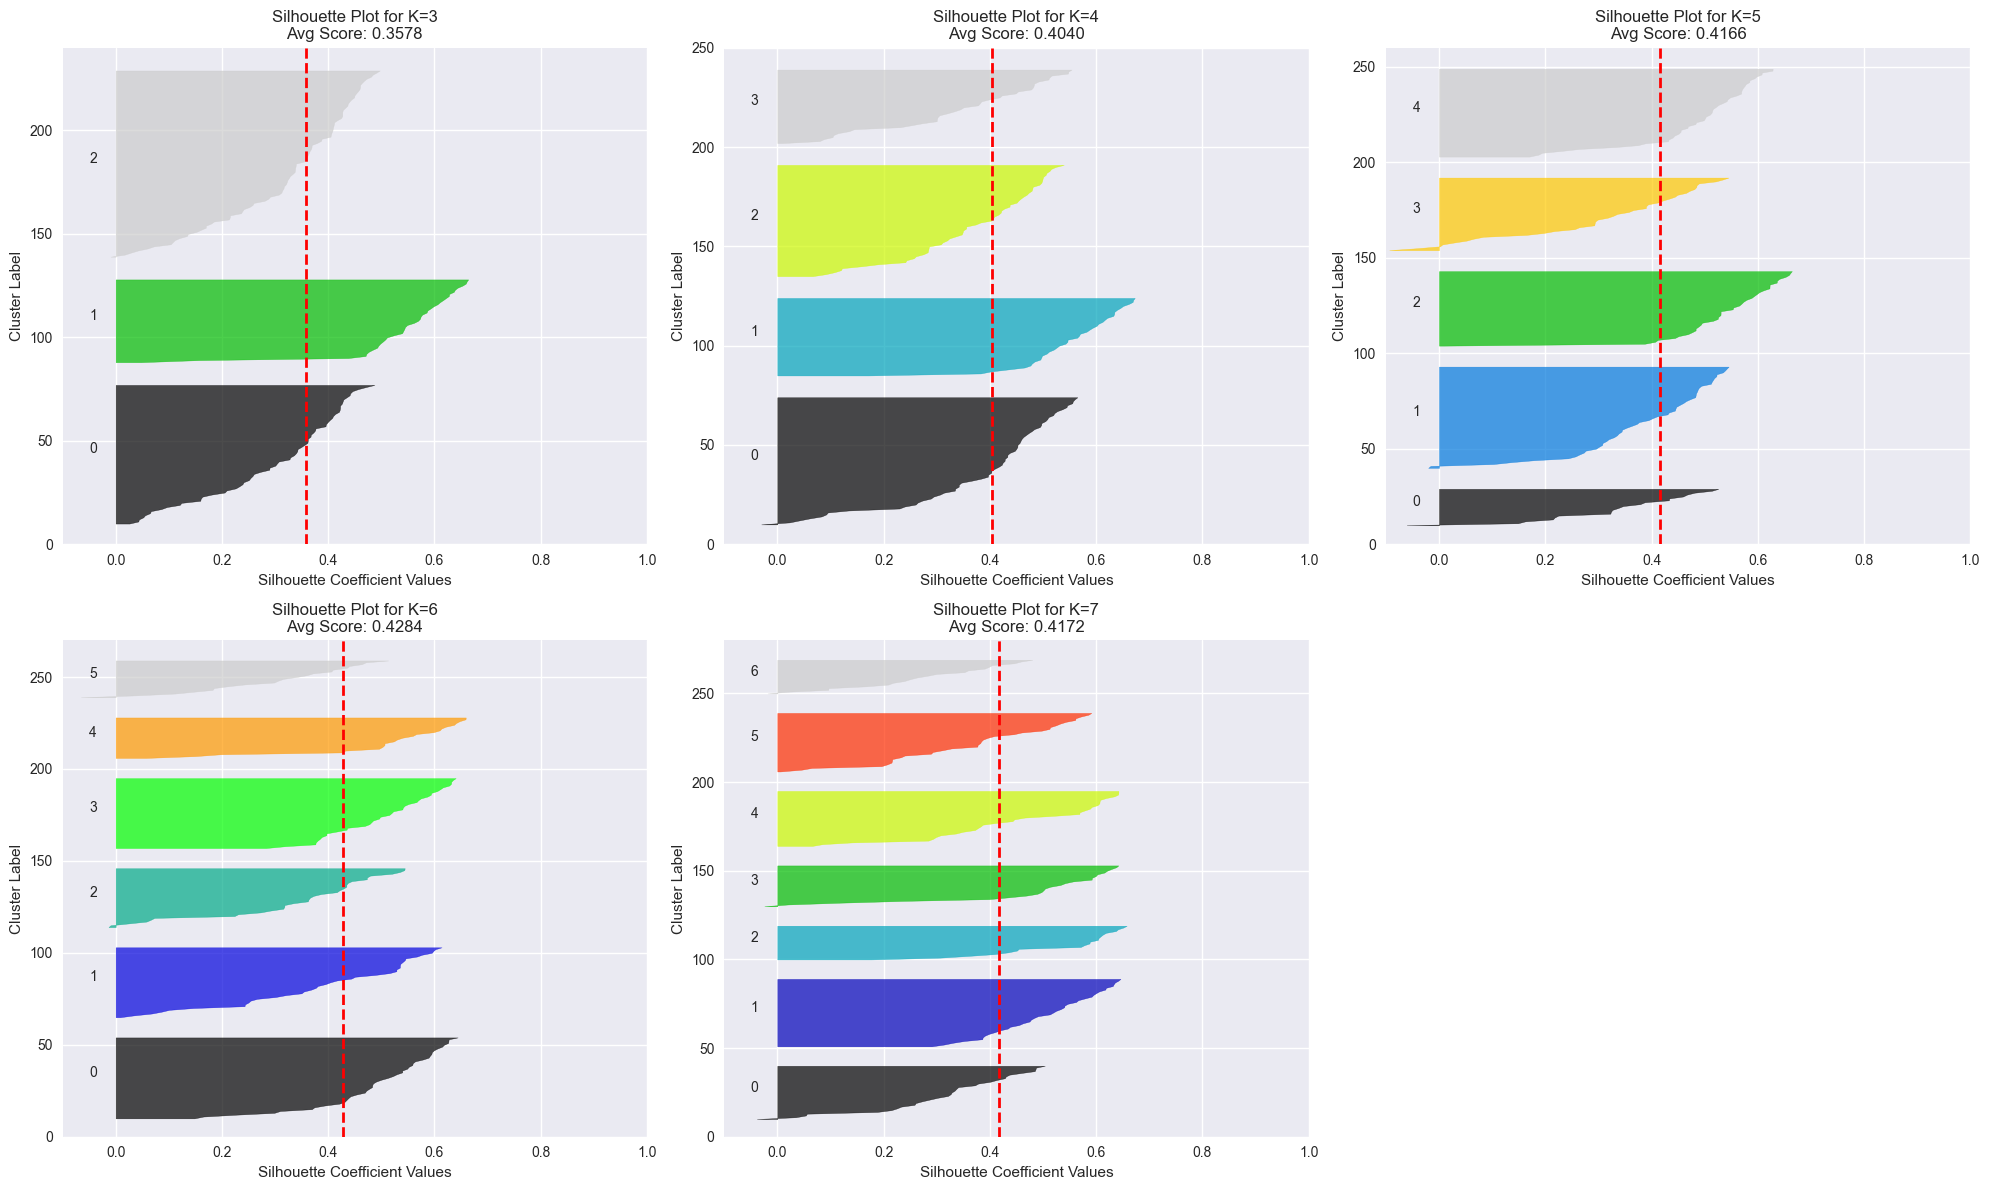


3. Comprehensive Model Evaluation...
K = 3:
  Silhouette Score: 0.3578 (higher is better)
  Calinski-Harabasz Score: 101.69 (higher is better)
  Davies-Bouldin Score: 1.0503 (lower is better)
  Inertia: 295.21 (lower is better)
K = 4:
  Silhouette Score: 0.4040 (higher is better)
  Calinski-Harabasz Score: 125.68 (higher is better)
  Davies-Bouldin Score: 0.9308 (lower is better)
  Inertia: 205.23 (lower is better)
K = 5:
  Silhouette Score: 0.4166 (higher is better)
  Calinski-Harabasz Score: 125.10 (higher is better)
  Davies-Bouldin Score: 0.8746 (lower is better)
  Inertia: 168.25 (lower is better)
K = 6:
  Silhouette Score: 0.4284 (higher is better)
  Calinski-Harabasz Score: 135.10 (higher is better)
  Davies-Bouldin Score: 0.8254 (lower is better)
  Inertia: 133.87 (lower is better)
K = 7:
  Silhouette Score: 0.4172 (higher is better)
  Calinski-Harabasz Score: 132.77 (higher is better)
  Davies-Bouldin Score: 0.7935 (lower is better)
  Inertia: 117.01 (lower is better)

4. Eva

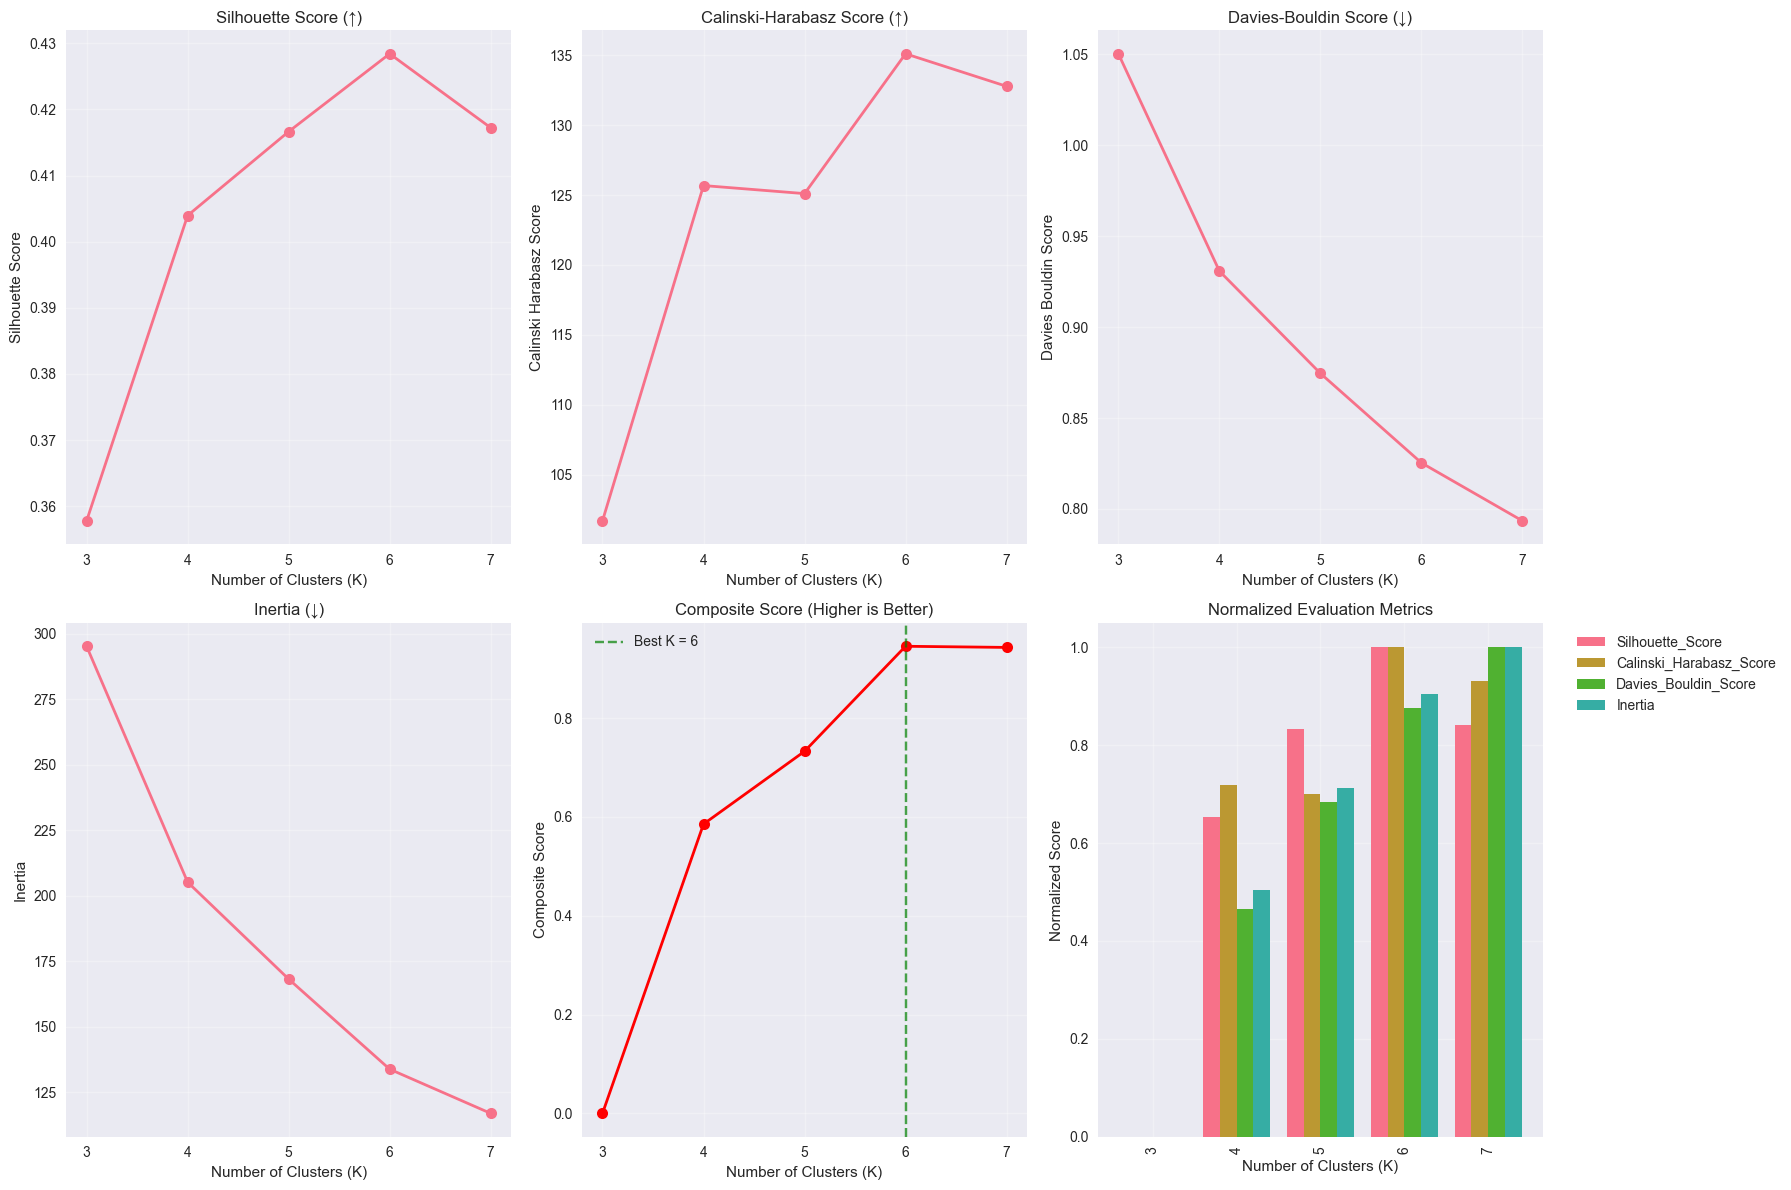


6. Final Model Selection and Analysis...
Best K based on composite score: 6

Final Model Performance (K=6):
  Silhouette Score: 0.4284
  Calinski-Harabasz Score: 135.10
  Davies-Bouldin Score: 0.8254
  Inertia: 133.87

7. Cluster Validation...
Cluster 0 WCSS: 23.99
Cluster 1 WCSS: 21.15
Cluster 2 WCSS: 34.69
Cluster 3 WCSS: 22.48
Cluster 4 WCSS: 10.94
Cluster 5 WCSS: 20.63

Total Within-Cluster Sum of Squares: 133.87
Between-Cluster Sum of Squares: 466.13
Total Sum of Squares: 600.00

8. Saving Final Results...


TypeError: Object of type int64 is not JSON serializable

In [5]:
# Task 8: Clustering with K-Means - Part 5
# Silhouette Analysis and Model Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset and prepare features
df = pd.read_csv('Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print(" Part 5: Silhouette Analysis and Model Evaluation \n")

# 1. Detailed Silhouette Analysis
print("1. Detailed Silhouette Analysis...")

# Test different K values for comprehensive analysis
k_values = [3, 4, 5, 6, 7]
silhouette_results = {}

for k in k_values:
    print(f"\nAnalyzing K = {k}...")
    
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    silhouette_results[k] = {
        'avg_score': silhouette_avg,
        'sample_scores': sample_silhouette_values,
        'cluster_labels': cluster_labels,
        'kmeans_model': kmeans
    }
    
    print(f"  Average Silhouette Score: {silhouette_avg:.4f}")
    
    # Calculate per-cluster silhouette scores
    for cluster_id in range(k):
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_id]
        cluster_avg = cluster_silhouette_values.mean()
        print(f"  Cluster {cluster_id}: {cluster_avg:.4f} (size: {len(cluster_silhouette_values)})")

# 2. Silhouette Plots
print("\n2. Creating Silhouette Plots...")

# Create silhouette plots for different K values
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, k in enumerate(k_values):
    if i >= len(axes):
        break
        
    ax = axes[i]
    
    # Get data for this K
    silhouette_avg = silhouette_results[k]['avg_score']
    sample_silhouette_values = silhouette_results[k]['sample_scores']
    cluster_labels = silhouette_results[k]['cluster_labels']
    
    # Plot silhouette plot
    y_lower = 10
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, k))
    
    for cluster_id in range(k):
        # Aggregate silhouette scores for samples belonging to cluster_id
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_id]
        cluster_silhouette_values.sort()
        
        size_cluster = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster
        
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, cluster_silhouette_values,
                        facecolor=colors[cluster_id], edgecolor=colors[cluster_id], alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster_id))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')
    ax.set_title(f'Silhouette Plot for K={k}\nAvg Score: {silhouette_avg:.4f}')
    
    # Add vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scaled) + (k + 1) * 10])

# Remove empty subplots
for i in range(len(k_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 3. Comprehensive Model Evaluation
print("\n3. Comprehensive Model Evaluation...")

# Calculate multiple evaluation metrics
evaluation_metrics = {}

for k in k_values:
    cluster_labels = silhouette_results[k]['cluster_labels']
    kmeans_model = silhouette_results[k]['kmeans_model']
    
    # Calculate various metrics
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
    inertia = kmeans_model.inertia_
    
    evaluation_metrics[k] = {
        'Silhouette_Score': silhouette_avg,
        'Calinski_Harabasz_Score': calinski_harabasz,
        'Davies_Bouldin_Score': davies_bouldin,
        'Inertia': inertia
    }
    
    print(f"K = {k}:")
    print(f"  Silhouette Score: {silhouette_avg:.4f} (higher is better)")
    print(f"  Calinski-Harabasz Score: {calinski_harabasz:.2f} (higher is better)")
    print(f"  Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
    print(f"  Inertia: {inertia:.2f} (lower is better)")

# 4. Evaluation Metrics Comparison
print("\n4. Evaluation Metrics Comparison...")

# Create comparison DataFrame
eval_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
print("\nEvaluation Metrics Summary:")
print(eval_df.round(4))

# Normalize metrics for comparison (0-1 scale)
eval_df_normalized = eval_df.copy()
eval_df_normalized['Silhouette_Score'] = (eval_df['Silhouette_Score'] - eval_df['Silhouette_Score'].min()) / (eval_df['Silhouette_Score'].max() - eval_df['Silhouette_Score'].min())
eval_df_normalized['Calinski_Harabasz_Score'] = (eval_df['Calinski_Harabasz_Score'] - eval_df['Calinski_Harabasz_Score'].min()) / (eval_df['Calinski_Harabasz_Score'].max() - eval_df['Calinski_Harabasz_Score'].min())
eval_df_normalized['Davies_Bouldin_Score'] = 1 - (eval_df['Davies_Bouldin_Score'] - eval_df['Davies_Bouldin_Score'].min()) / (eval_df['Davies_Bouldin_Score'].max() - eval_df['Davies_Bouldin_Score'].min())  # Invert because lower is better
eval_df_normalized['Inertia'] = 1 - (eval_df['Inertia'] - eval_df['Inertia'].min()) / (eval_df['Inertia'].max() - eval_df['Inertia'].min())  # Invert because lower is better

# Calculate composite score
eval_df_normalized['Composite_Score'] = eval_df_normalized.mean(axis=1)

print("\nNormalized Scores (0-1 scale, higher is better):")
print(eval_df_normalized.round(4))

# 5. Visualization of Evaluation Metrics
print("\n5. Visualizing Evaluation Metrics...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot individual metrics
metrics = ['Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Score', 'Inertia']
metric_titles = ['Silhouette Score (↑)', 'Calinski-Harabasz Score (↑)', 'Davies-Bouldin Score (↓)', 'Inertia (↓)']

for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    ax.plot(k_values, eval_df[metric], 'o-', linewidth=2, markersize=8)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel(metric.replace('_', ' '))
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(k_values)

# Plot composite score
ax = axes[1, 1]
ax.plot(k_values, eval_df_normalized['Composite_Score'], 'ro-', linewidth=2, markersize=8)
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('Composite Score')
ax.set_title('Composite Score (Higher is Better)')
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# Highlight best K
best_k = eval_df_normalized['Composite_Score'].idxmax()
best_score = eval_df_normalized['Composite_Score'].max()
ax.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'Best K = {best_k}')
ax.legend()

# Bar chart of normalized scores
ax = axes[1, 2]
eval_df_normalized[['Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Score', 'Inertia']].plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Normalized Evaluation Metrics')
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('Normalized Score')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Final Model Selection and Analysis
print("\n6. Final Model Selection and Analysis...")

# Select the best K based on composite score
best_k = eval_df_normalized['Composite_Score'].idxmax()
print(f"Best K based on composite score: {best_k}")

# Fit final model with best K
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)

# Add labels to original dataframe
df_final = df.copy()
df_final['Cluster'] = final_labels

print(f"\nFinal Model Performance (K={best_k}):")
print(f"  Silhouette Score: {silhouette_score(X_scaled, final_labels):.4f}")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, final_labels):.2f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled, final_labels):.4f}")
print(f"  Inertia: {final_kmeans.inertia_:.2f}")

# 7. Cluster Validation
print("\n7. Cluster Validation...")

# Within-cluster sum of squares (WCSS) for each cluster
wcss_per_cluster = []
for i in range(best_k):
    cluster_data = X_scaled[final_labels == i]
    cluster_center = final_kmeans.cluster_centers_[i]
    wcss = np.sum((cluster_data - cluster_center) ** 2)
    wcss_per_cluster.append(wcss)
    print(f"Cluster {i} WCSS: {wcss:.2f}")

# Between-cluster sum of squares (BCSS)
overall_center = np.mean(X_scaled, axis=0)
bcss = 0
for i in range(best_k):
    cluster_size = np.sum(final_labels == i)
    cluster_center = final_kmeans.cluster_centers_[i]
    bcss += cluster_size * np.sum((cluster_center - overall_center) ** 2)

print(f"\nTotal Within-Cluster Sum of Squares: {sum(wcss_per_cluster):.2f}")
print(f"Between-Cluster Sum of Squares: {bcss:.2f}")
print(f"Total Sum of Squares: {sum(wcss_per_cluster) + bcss:.2f}")

# 8. Save Final Results
print("\n8. Saving Final Results...")

# Save evaluation results
eval_df.to_csv('evaluation_metrics.csv')
eval_df_normalized.to_csv('normalized_evaluation_metrics.csv')

# Save final clustered data
df_final.to_csv('final_clustered_customers.csv', index=False)

# Save final model parameters
model_info = {
    'best_k': best_k,
    'silhouette_score': silhouette_score(X_scaled, final_labels),
    'calinski_harabasz_score': calinski_harabasz_score(X_scaled, final_labels),
    'davies_bouldin_score': davies_bouldin_score(X_scaled, final_labels),
    'inertia': final_kmeans.inertia_,
    'cluster_centers': final_kmeans.cluster_centers_.tolist()
}

import json
with open('final_model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print("Final results saved successfully!")
print("Files created:")
print(" evaluation_metrics.csv: All evaluation metrics")
print(" normalized_evaluation_metrics.csv: Normalized metrics for comparison")
print(" final_clustered_customers.csv: Final clustered dataset")
print(" final_model_info.json: Final model parameters and scores")

# 9. Summary and Recommendations
print("\n9. Summary and Recommendations...")

print("\nCLUSTERING ANALYSIS SUMMARY")


print(f" Dataset: {len(df)} customers with {len(features)} features")
print(f" Optimal number of clusters: {best_k}")
print(f" Final silhouette score: {silhouette_score(X_scaled, final_labels):.4f}")
print(f" Model explains {(bcss / (sum(wcss_per_cluster) + bcss)) * 100:.1f}% of variance")

print("\nModel Quality Assessment:")
if silhouette_score(X_scaled, final_labels) > 0.5:
    print(" Excellent cluster separation")
elif silhouette_score(X_scaled, final_labels) > 0.3:
    print(" Good cluster separation")
else:
    print(" Moderate cluster separation")

print("\nNext Steps:")
print("1. Use clusters for targeted marketing campaigns")
print("2. Develop cluster-specific product strategies")
print("3. Monitor cluster drift over time")
print("4. Validate clusters with business domain experts")

print("\n=== CLUSTERING ANALYSIS COMPLETE ===")
print("All parts successfully executed!")